# CM4044 Project 2

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
data = pd.read_csv('enthalpy_data.csv', sep=',')

data = data[['Smiles','Enthalpy(kcal)']]

# calculate the molecules descriptors and append them to the data object
data['Mol'] = data['Smiles'].apply(Chem.MolFromSmiles)

descriptor_names = [desc_name for desc_name, _ in Descriptors._descList]
# print(descriptor_names)
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
def calc_all_descriptors(mol):
    if mol is None:
        return [None] * len(descriptor_names)
    return list(calculator.CalcDescriptors(mol))
data['Descriptors'] = data['Mol'].apply(calc_all_descriptors)
data.rename(columns={'Enthalpy(kcal)': 'Enthalpy'}, inplace=True)

data.head(5)

/var/folders/j8/jh2j4zt912v3mqx01zx76dym0000gn/T/ipykernel_4621/307725486.py:1: DtypeWarning: Columns (121,122,301,302,303,304,305,307,308,309,422,423,424,425,426,428,429,430,488,489,490,491,492,494,495,496,522,523,524,525,526,528,529,530,556,557,558,559,560,562,563,564,590,591,592,593,594,596,597,598,624,625,626,627,628,630,631,632,658,659,660,661,662,664,665,666,1638,1639,1640,1641,1642,1644,1645,1646) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('enthalpy_data.csv', sep=',')


,Smiles,Enthalpy,Mol,Descriptors
0,CCCCCCCCCCCCCCCCCC,-99.091888,<rdkit.Chem.rdchem.Mol object at 0x16ad7f0d0>,"[2.2939033705287217, 2.2939033705287217, 1.373..."
1,CCCCCCCCCCCCCCCC,-89.480000,<rdkit.Chem.rdchem.Mol object at 0x16ad7f140>,"[2.2902201417224934, 2.2902201417224934, 1.372..."
2,CCCCC(C)(C)CC(C)(C)CCCC,-87.619600,<rdkit.Chem.rdchem.Mol object at 0x16ad7f1b0>,"[2.440829081632653, 2.440829081632653, 0.53497..."
3,CCCC(C)(CC)CC(C)(CC)CCC,-82.958983,<rdkit.Chem.rdchem.Mol object at 0x16ad7f220>,"[2.486180555555556, 2.486180555555556, 0.57805..."
4,CCCCCCCCCCCCCCC,-84.390000,<rdkit.Chem.rdchem.Mol object at 0x16ad7f290>,"[2.2879979195002713, 2.2879979195002713, 1.372..."


In [ ]:
# convert into data in numpy array

X = np.array(list(data['Descriptors']))
y = data['Enthalpy'].to_numpy()

st = StandardScaler()
X = st.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

Linear Regression R-Squared: 0.9957166989771661
Linear Regression RMSE: 2.0399096737033875


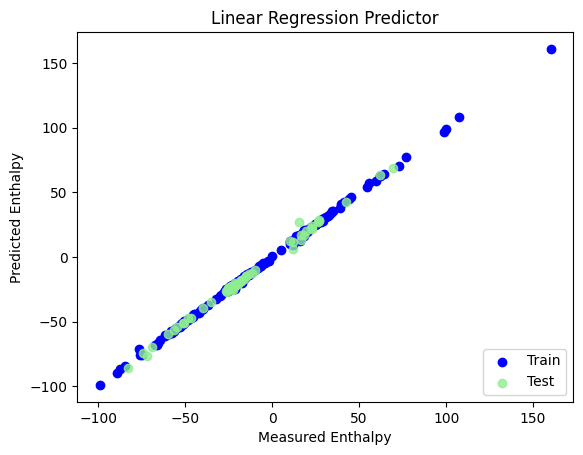

In [59]:
np.random.seed(0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#model evaluation
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression R-Squared: {r2_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

plt.scatter(y_train,lr.predict(X_train), label = 'Train', c='blue')
plt.title('Linear Regression Predictor')
plt.xlabel('Measured Enthalpy')
plt.ylabel('Predicted Enthalpy')
plt.scatter(y_test,lr.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
#plt.savefig('Linear Regression Predictor.png', dpi=300)
plt.show()

### SVR

SVR R-Squared: 0.9965268717819415
SVR RMSE: 1.8368853365389002


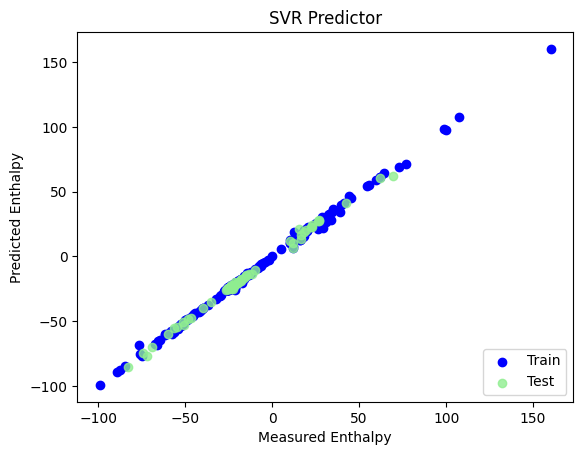

In [ ]:
from sklearn.svm import SVR

np.random.seed(0)
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

#model evaluation
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"SVR R-Squared: {r2_svr}")
print(f"SVR RMSE: {rmse_svr}")

plt.scatter(y_train,svr.predict(X_train), label = 'Train', c='blue')
plt.title('SVR Predictor')
plt.xlabel('Measured Enthalpy')
plt.ylabel('Predicted Enthalpy')
plt.scatter(y_test,svr.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
#plt.savefig('SVR Predictor.png', dpi=300)
plt.show()